# Fun Experimen 1: Doubling the bet

HW Roh (hyunwoo@uchicago.edu)

We consider the game with coin tossing. We get 1 point when the head shows up and we lose 1 point when the tail shows up with 1/2 probability respectively. 

Game Setting

- There are two players: me and dealer

- We start the game with 1 USD bet. The total pot is 2 USD.

- Each round, we flip the fair coin. When head, point increase by 1 point. When tail, point decrease by 1 point.

- Game ends when the point become either +2 or -2. When the point reaches 2, I take the pot. When the point reaches -2, dealer takes the pot.

- Each round, I am asked whether to double the pot or not. 

- There are some possible strategies

    1. Never raise the pot size

    2. Double the pot size whenever the point reaches to 1.

    3. Double the pot size whenever the point reaches to 0 or 1.

    4. Double the pot size every time.

- What are the expected payoff for each strategy?

In [82]:
import numpy as np
import pandas as pd

def get_sim(n, strategy2=False):

    #np.random.seed(2018)
    sum_gain = 0
    sum_count = 0
    gains = []
    counts = []
    if strategy2 == False:
        for i in range(n):
            point = 0
            count = 0
            pot = 2
            payout = 0
            
            while (point < 2) and (point > -2):
                
                if point >= 1: # double pot whenever my point recheases 1
                    pot *= 2

                coin_toss = np.random.randint(0, 2)
                count += 1
                counter += 1

                if coin_toss: 
                    point += 1
                else:
                    point -= 1

            payout = 0.5 * pot * np.sign(point)
            sum_gain += payout
            gains.append(payout)
            sum_count += count
            counts.append(count)
    else:
        for i in range(n):
            point = 0
            count = 0
            pot = 2
            payout = 0
            while (point < 2) and (point > -2):

                if (point == 0) and (count > 0): # double pot whenever my point recheases 1
                    pot *= 2
            
                if (point == 1):
                    pot *=2
                    
                coin_toss = np.random.randint(0, 2)
                count += 1
                counter += 1

                if coin_toss: 
                    point += 1
                else:
                    point -= 1

            payout = 0.5 * pot * np.sign(point)
            sum_gain += payout
            gains.append(payout)
            sum_count += count
            counts.append(count)

    print(f"Simulated {n} times, result: {sum_gain/n}.") 
    print('count:', sum_count/n)
    
    return [gains, counts]

In [92]:
gains, counts = get_sim(50000, True)
np.min(gains), np.max(gains), np.max(counts)

Simulated 50000 times, result: 10172.86006.
count: 3.99968


In [84]:
df = pd.DataFrame({'Payout': gains, 'Toss_Count': counts})

In [85]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

          Payout  Toss_Count
0           -1.0           2
1            2.0           2
2            2.0           2
3           -8.0           6
4            2.0           2
5           -4.0           4
6           -4.0           4
7           -1.0           2
8           -1.0           2
9           -1.0           2
10           4.0           4
11           4.0           4
12          16.0           6
13        -256.0          14
14          16.0           6
15           8.0           6
16           2.0           2
17         128.0           8
18          -8.0           6
19           2.0           2
20           2.0           2
21           8.0           4
22          -2.0           4
23          -2.0           4
24           4.0           4
25           2.0           2
26       -2048.0          14
27           2.0           2
28           2.0           2
29          -1.0           2
30           2.0           2
31           8.0           6
32          -1.0           2
33           8

In [95]:
df.describe([r/100 for r in range(0, 105, 5)])

,Payout,Toss_Count
count,5.000000e+04,50000.00000
mean,-1.090265e+02,4.00856
std,5.873314e+04,2.82980
min,-8.388608e+06,2.00000
0%,-8.388608e+06,2.00000
5%,-1.600000e+01,2.00000
10%,-8.000000e+00,2.00000
15%,-4.000000e+00,2.00000
20%,-2.000000e+00,2.00000
25%,-1.000000e+00,2.00000


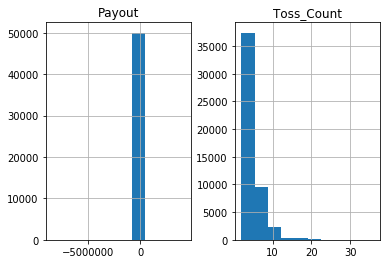

In [96]:
import matplotlib.pyplot as plt

df.hist()
plt.show()

# Restricting the total number of draw

In [103]:
def get_sim_2(n, strategy2=False):

    #np.random.seed(2018)
    sum_gain = 0
    sum_count = 0
    gains = []
    counts = []

    for i in range(n):
        point = 0
        count = 0
        pot = 2
        counter = 0
        payout = 0
        while (point < 2) and (point > -2):

            if counter == 10:
                pot = 2 
                counter = 0

            if (point == 0) and (counter>0): # double pot whenever my point recheases 1
                pot *= 2

            if (point == 1):
                pot *=2

            coin_toss = np.random.randint(0, 2)
            count += 1
            counter += 1

            if coin_toss: 
                point += 1
            else:
                point -= 1

        payout = 0.5 * pot * np.sign(point)
        sum_gain += payout
        gains.append(payout)
        sum_count += count
        counts.append(count)

    print(f"Simulated {n} times, result: {sum_gain/n}.") 
    print('count:', sum_count/n)
    
    return [gains, counts]

In [112]:
gains, counts = get_sim_2(50000, True)
np.min(gains), np.max(gains), np.max(counts)

Simulated 50000 times, result: 3.47458.
count: 3.99352


(-256.0, 512.0, 30)